<a href="https://colab.research.google.com/github/Akira1125/Coursera_Applied_Data_Science_1/blob/master/Titanic_copied2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h2>必要なモジュールのインポート</h2>

In [1]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"akiraishii","key":"5487617ae47da8cb90b2857957db726d"}'}

In [0]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [3]:
!pip install kaggle

In [0]:
!chmod 600 /root/.kaggle/kaggle.json

In [5]:
!kaggle competitions download -c titanic

  0% 0.00/59.8k [00:00<?, ?B/s]
100% 59.8k/59.8k [00:00<00:00, 48.1MB/s]
  0% 0.00/28.0k [00:00<?, ?B/s]
100% 28.0k/28.0k [00:00<00:00, 23.3MB/s]
  0% 0.00/3.18k [00:00<?, ?B/s]
100% 3.18k/3.18k [00:00<00:00, 2.45MB/s]


In [6]:
#unzip the zip files
!unzip \*.zip

unzip:  cannot find or open *.zip, *.zip.zip or *.zip.ZIP.

No zipfiles found.


In [7]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../content"))

# Any results you write to the current directory are saved as output.

['.config', 'kaggle.json', 'test.csv', 'train.csv', 'gender_submission.csv', 'sample_data']


In [0]:
train_df = pd.read_csv('../content/train.csv')
test_df = pd.read_csv('../content/test.csv')
result_df = test_df[['PassengerId']]

In [9]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [10]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [0]:
#train_df['Name'].apply(lambda x: x.split(', ')[1].split('.')[0]).unique()
major_prefix = train_df['Name'].apply(lambda x: x.split(', ')[1].split('.')[0]).value_counts()[:5]
major_prefix_lst = list(major_prefix.index)

In [12]:
test_df['Name'].apply(lambda x: x.split(', ')[1].split('.')[0]).value_counts()

Mr        240
Miss       78
Mrs        72
Master     21
Rev         2
Col         2
Dona        1
Dr          1
Ms          1
Name: Name, dtype: int64

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1468: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


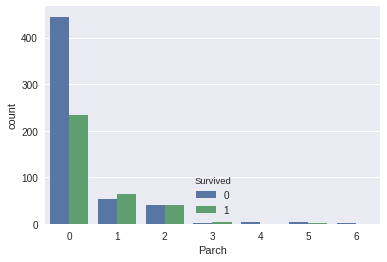

In [18]:
sns.countplot('Parch', hue='Survived', data=train_df)

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1468: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


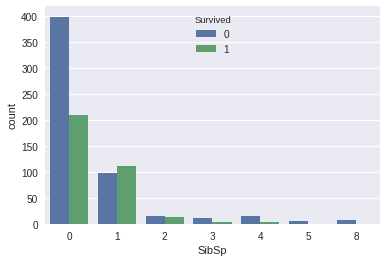

In [19]:
sns.countplot('SibSp', hue='Survived', data=train_df)

<h2>**ターゲットとなる値をチェック**</h2>

In [0]:
train_df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [0]:
train_df['Cabin'].isnull().sum() / len(train_df)

0.7710437710437711

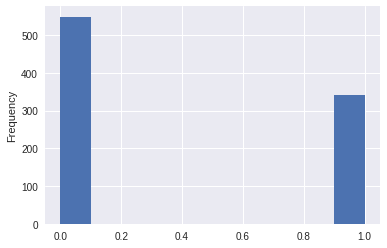

In [0]:
train_df['Survived'].plot.hist()

<h2>**NaNの値をチェック**</h2>

In [0]:
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [0]:
def get_missing_columns(df):
    mis_vals = df.isnull().sum()
    mis_vals_percent = 100 * df.isnull().sum() / len(df)
    mis_val_table = pd.concat([mis_vals, mis_vals_percent], axis=1)
    mis_val_ren_table = mis_val_table.rename(columns = {0: 'number of missing values', 
                                                       1: '% of total values'})
    mis_val_ren_table = mis_val_ren_table[mis_val_ren_table.iloc[:, 1]!=0].sort_values('% of total values', ascending=False)
    
    return mis_val_ren_table

In [0]:
get_missing_columns(train_df)

,number of missing values,% of total values
Cabin,687,77.104377
Age,177,19.865320
Embarked,2,0.224467


In [0]:
#乗組員だったのかを区分するカラムを追加
def add_has_cabin_num(df):
  df['has Cabin Number'] = df['Cabin'].notnull().apply(lambda x: int(x))
add_has_cabin_num(train_df)
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,has Cabin Number
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


In [0]:
#年齢による区分
def add_age_category(df):
  age_category_lst = list()
  import math
  for i in range(len(train_df)):
      age = train_df.iloc[i,5]
      if math.isnan(age):
          age_category_lst.append('nan')
      elif age <5:
          age_category_lst.append('baby')
      elif age <10:
          age_category_lst.append('child')
      elif age < 20:
          age_category_lst.append('10s')
      elif age < 30:
          age_category_lst.append('20s')
      elif age < 40:
          age_category_lst.append('30s')
      elif age < 50:
          age_category_lst.append('40s')
      elif age < 60:
          age_category_lst.append('50s')
      else:
          age_category_lst.append('senior')
  
  df['age_category'] = age_category_lst
#train_df

In [0]:
add_age_category(train_df)
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,has Cabin Number,age_category
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,20s
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,30s
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,20s
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,30s
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,30s


In [0]:
def convert_prefix(x):
  prefix = x.split(', ')[1].split('.')[0] 
  if prefix not in major_prefix_lst:
    prefix = 'Others'
  return prefix

In [0]:
#敬称の情報を追加
def add_prefix(df):
  df['prefix'] = df['Name'].apply(convert_prefix)
add_prefix(train_df)
train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,has Cabin Number,age_category,prefix
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,20s,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,30s,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,20s,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,30s,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,30s,Mr
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,0,nan,Mr
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,1,50s,Mr
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,0,baby,Master
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,0,20s,Mrs
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,0,10s,Mrs


In [24]:
#一人以上Parchいるかどうかで分割
def convert_Parch(parch):
  if parch ==0:
    return 0
  else:
    return 1
    
train_df['has Parch'] = train_df['Parch'].apply(convert_Parch)
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,has Parch
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


In [28]:
#test_df['Parch'].value_counts()
test_df['has Parch'] = test_df['Parch'].apply(convert_Parch)
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,has Parch
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,0
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,1


In [30]:
#兄弟構成については0, 1, 2, 3以上の4カテゴリーに分割
def convert_SibSp(sibsp):
  if sibsp==0:
    return '0'
  elif sibsp==1:
    return '1'
  elif sibsp ==2:
    return '2'
  else:
    return 'More than 3'
  
train_df['Num_SibSp'] = train_df['SibSp'].apply(convert_SibSp)
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,has Parch,Num_SibSp
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,0


In [0]:
#不要なカラムの消去。SibSpとParchも消去してみる
train_df.drop(['PassengerId', 'Name', 'Cabin', 'Ticket'], inplace=True, axis=1)
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,has Cabin Number,age_category,prefix
0,0,3,male,22.0,1,0,7.2500,S,0,20s,Mr
1,1,1,female,38.0,1,0,71.2833,C,1,30s,Mrs
2,1,3,female,26.0,0,0,7.9250,S,0,20s,Miss
3,1,1,female,35.0,1,0,53.1000,S,1,30s,Mrs
4,0,3,male,35.0,0,0,8.0500,S,0,30s,Mr


In [0]:
X_train = train_df[['Pclass','Sex', 'SibSp', 'Parch', 'Fare', 'Embarked', 'has Cabin Number', 'age_category', 'prefix']]
y_train = train_df[['Survived']]

<h2>データの処理</h2>

In [0]:
#One hot value
X_train_one_hot = pd.get_dummies(X_train, columns=['Pclass','Sex','Embarked', 'prefix', 'has Cabin Number', 'age_category'])
X_train_one_hot

,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,...,has Cabin Number_1,age_category_10s,age_category_20s,age_category_30s,age_category_40s,age_category_50s,age_category_baby,age_category_child,age_category_nan,age_category_senior
0,1,0,7.2500,0,0,1,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
1,1,0,71.2833,1,0,0,1,0,1,0,...,1,0,0,1,0,0,0,0,0,0
2,0,0,7.9250,0,0,1,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,1,0,53.1000,1,0,0,1,0,0,0,...,1,0,0,1,0,0,0,0,0,0
4,0,0,8.0500,0,0,1,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
5,0,0,8.4583,0,0,1,0,1,0,1,...,0,0,0,0,0,0,0,0,1,0
6,0,0,51.8625,1,0,0,0,1,0,0,...,1,0,0,0,0,1,0,0,0,0
7,3,1,21.0750,0,0,1,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
8,0,2,11.1333,0,0,1,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
9,1,0,30.0708,0,1,0,1,0,1,0,...,0,1,0,0,0,0,0,0,0,0


In [0]:
X_train_one_hot.drop(['Sex_male', 'has Cabin Number_0'], axis=1, inplace=True)

In [0]:
#Normalize the column values
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [0]:
X_train_scaled = sc.fit_transform(X_train_one_hot)
X_train_scaled

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/usr/local/lib/python3.6/dist-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


array([[ 0.43279337, -0.47367361, -0.50244517, ..., -0.15911146,
        -0.49789473, -0.17337186],
       [ 0.43279337, -0.47367361,  0.78684529, ..., -0.15911146,
        -0.49789473, -0.17337186],
       [-0.4745452 , -0.47367361, -0.48885426, ..., -0.15911146,
        -0.49789473, -0.17337186],
       ...,
       [ 0.43279337,  2.00893337, -0.17626324, ..., -0.15911146,
         2.0084567 , -0.17337186],
       [-0.4745452 , -0.47367361, -0.04438104, ..., -0.15911146,
        -0.49789473, -0.17337186],
       [-0.4745452 , -0.47367361, -0.49237783, ..., -0.15911146,
        -0.49789473, -0.17337186]])

In [0]:
scaled_table_train = pd.DataFrame(data=X_train_scaled, columns=X_train_one_hot.columns)
scaled_table_train

,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Embarked_C,Embarked_Q,Embarked_S,...,has Cabin Number_1,age_category_10s,age_category_20s,age_category_30s,age_category_40s,age_category_50s,age_category_baby,age_category_child,age_category_nan,age_category_senior
0,0.432793,-0.473674,-0.502445,-0.565685,-0.510152,0.902587,-0.737695,-0.482043,-0.307562,0.619306,...,-0.544925,-0.359552,1.746425,-0.480274,-0.333125,-0.238620,-0.216803,-0.159111,-0.497895,-0.173372
1,0.432793,-0.473674,0.786845,1.767767,-0.510152,-1.107926,1.355574,2.074505,-0.307562,-1.614710,...,1.835115,-0.359552,-0.572598,2.082145,-0.333125,-0.238620,-0.216803,-0.159111,-0.497895,-0.173372
2,-0.474545,-0.473674,-0.488854,-0.565685,-0.510152,0.902587,1.355574,-0.482043,-0.307562,0.619306,...,-0.544925,-0.359552,1.746425,-0.480274,-0.333125,-0.238620,-0.216803,-0.159111,-0.497895,-0.173372
3,0.432793,-0.473674,0.420730,1.767767,-0.510152,-1.107926,1.355574,-0.482043,-0.307562,0.619306,...,1.835115,-0.359552,-0.572598,2.082145,-0.333125,-0.238620,-0.216803,-0.159111,-0.497895,-0.173372
4,-0.474545,-0.473674,-0.486337,-0.565685,-0.510152,0.902587,-0.737695,-0.482043,-0.307562,0.619306,...,-0.544925,-0.359552,-0.572598,2.082145,-0.333125,-0.238620,-0.216803,-0.159111,-0.497895,-0.173372
5,-0.474545,-0.473674,-0.478116,-0.565685,-0.510152,0.902587,-0.737695,-0.482043,3.251373,-1.614710,...,-0.544925,-0.359552,-0.572598,-0.480274,-0.333125,-0.238620,-0.216803,-0.159111,2.008457,-0.173372
6,-0.474545,-0.473674,0.395814,1.767767,-0.510152,-1.107926,-0.737695,-0.482043,-0.307562,0.619306,...,1.835115,-0.359552,-0.572598,-0.480274,-0.333125,4.190764,-0.216803,-0.159111,-0.497895,-0.173372
7,2.247470,0.767630,-0.224083,-0.565685,-0.510152,0.902587,-0.737695,-0.482043,-0.307562,0.619306,...,-0.544925,-0.359552,-0.572598,-0.480274,-0.333125,-0.238620,4.612483,-0.159111,-0.497895,-0.173372
8,-0.474545,2.008933,-0.424256,-0.565685,-0.510152,0.902587,1.355574,-0.482043,-0.307562,0.619306,...,-0.544925,-0.359552,1.746425,-0.480274,-0.333125,-0.238620,-0.216803,-0.159111,-0.497895,-0.173372
9,0.432793,-0.473674,-0.042956,-0.565685,1.960202,-1.107926,1.355574,2.074505,-0.307562,-1.614710,...,-0.544925,2.781240,-0.572598,-0.480274,-0.333125,-0.238620,-0.216803,-0.159111,-0.497895,-0.173372


<h2>データをさらに確認</h2>

In [0]:
scaled_table_with_y = pd.concat([y_train, scaled_table_train], axis=1)
scaled_table_with_y.head()

,Survived,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Embarked_C,Embarked_Q,...,has Cabin Number_1,age_category_10s,age_category_20s,age_category_30s,age_category_40s,age_category_50s,age_category_baby,age_category_child,age_category_nan,age_category_senior
0,0,0.432793,-0.473674,-0.502445,-0.565685,-0.510152,0.902587,-0.737695,-0.482043,-0.307562,...,-0.544925,-0.359552,1.746425,-0.480274,-0.333125,-0.23862,-0.216803,-0.159111,-0.497895,-0.173372
1,1,0.432793,-0.473674,0.786845,1.767767,-0.510152,-1.107926,1.355574,2.074505,-0.307562,...,1.835115,-0.359552,-0.572598,2.082145,-0.333125,-0.23862,-0.216803,-0.159111,-0.497895,-0.173372
2,1,-0.474545,-0.473674,-0.488854,-0.565685,-0.510152,0.902587,1.355574,-0.482043,-0.307562,...,-0.544925,-0.359552,1.746425,-0.480274,-0.333125,-0.23862,-0.216803,-0.159111,-0.497895,-0.173372
3,1,0.432793,-0.473674,0.420730,1.767767,-0.510152,-1.107926,1.355574,-0.482043,-0.307562,...,1.835115,-0.359552,-0.572598,2.082145,-0.333125,-0.23862,-0.216803,-0.159111,-0.497895,-0.173372
4,0,-0.474545,-0.473674,-0.486337,-0.565685,-0.510152,0.902587,-0.737695,-0.482043,-0.307562,...,-0.544925,-0.359552,-0.572598,2.082145,-0.333125,-0.23862,-0.216803,-0.159111,-0.497895,-0.173372


In [0]:
corr = scaled_table_with_y.corr()
corr.iloc[0, :].sort_values(ascending=False)

Survived               1.000000
Sex_female             0.543351
prefix_Mrs             0.339040
prefix_Miss            0.327093
has Cabin Number_1     0.316912
Pclass_1               0.285904
Fare                   0.257307
Embarked_C             0.168240
age_category_baby      0.129801
Pclass_2               0.093349
prefix_Master          0.085221
Parch                  0.081629
age_category_30s       0.052625
age_category_child     0.038005
prefix_Others          0.020615
age_category_50s       0.016108
age_category_10s       0.013398
prefix_Dr              0.008185
Embarked_Q             0.003650
age_category_40s      -0.001244
SibSp                 -0.035322
age_category_20s      -0.039842
age_category_senior   -0.040857
age_category_nan      -0.092197
Embarked_S            -0.155660
Pclass_3              -0.322308
prefix_Mr             -0.549199
Name: Survived, dtype: float64

In [0]:
#function which remove less important columns
def remove_columns(df, columns):
    df.drop(columns, axis=1, inplace=True)
    return df

In [0]:
#特徴量の削減。一旦全てコメントアウトしてみる。
#scaled_table_train = remove_columns(scaled_table_train, ['SibSp', 'age_category_10s', 'age_category_20s', 'age_category_30s', 'age_category_40s', 'age_category_50s', 'age_category_senior', 'age_category_nan', 'age_category_child'])
#scaled_table_train = remove_columns(scaled_table_train, ['SibSp', 'age_category_10s', 'age_category_20s', 'age_category_30s', 'age_category_40s', 'age_category_50s', 'age_category_60s', 'age_category_nan', 'age_category_child'])
#scaled_table_train

In [0]:
#sns.pairplot(scaled_table_with_y, hue='Survived')

<h2>モデルの学習</h2>

In [0]:
#一旦SVMはおやすみ
'''from sklearn.svm import SVC
model = SVC(kernel='linear')'''

In [0]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()

#グリッドサーチで最適なパラメータを見つける
from sklearn.model_selection import GridSearchCV
from sklearn.grid_search import RandomizedSearchCV
from scipy.stats import randint as sp_randint

'''param_dist = {"max_depth": [3, None],  #distribution
              "n_estimators":[50,100,200,300,400,500],
              "max_features": sp_randint(1, 11),
              "min_samples_split": sp_randint(2, 11),
              "min_samples_leaf": sp_randint(1, 11),
              "bootstrap": [True, False],
              "criterion": ["gini", "entropy"]}

forest_random = RandomizedSearchCV(estimator=rfc, param_distributions=param_dist, cv=3, n_iter=200, scoring='accuracy')
forest_random.fit(scaled_table_train, y_train)
forest_random_best = forest_random.best_estimator_
forest_random_best'''

param_grid = {"max_depth": [2,3, None],
              "n_estimators":[50,100,200,300,400,500],
              "max_features": [1, 3, 10],
              "min_samples_split": [2, 3, 10],
              "min_samples_leaf": [1, 3, 10],
              "bootstrap": [True, False],
              "criterion": ["gini", "entropy"]}

forest_grid = GridSearchCV(estimator=RandomForestClassifier(random_state=0),
                 param_grid = param_grid,   
                 scoring="accuracy",  #metrics
                 cv = 3,              #cross-validation
                 n_jobs = 1)          #number of core

forest_grid.fit(scaled_table_train, y_train) #fit

ModuleNotFoundError: ignored

In [0]:
forest_grid_best = forest_grid.best_estimator_
forest_grid_best

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features=10, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=10,
            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [0]:
from sklearn.ensemble import RandomForestClassifier
best_model = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=3, max_features=10, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=10,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)
best_model.fit(scaled_table_train, y_train)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features=10, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=10,
            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [0]:
'''import lightgbm as lgb
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(scaled_table_train, y_train, test_size=0.2, random_state=42)
lgb_train = lgb.Dataset(X_train, y_train)
lgb_eval = lgb.Dataset()
params = {'objective':'crossentropy'}
gbm = lgb.train(params, train_set=scaled_table_train)'''

"import lightgbm as lgb\nfrom sklearn.model_selection import train_test_split\nX_train, X_val, y_train, y_val = train_test_split(scaled_table_train, y_train, test_size=0.2, random_state=42)\nlgb_train = lgb.Dataset(X_train, y_train)\nlgb_eval = lgb.Dataset()\nparams = {'objective':'crossentropy'}\ngbm = lgb.train(params, train_set=scaled_table_train)"

In [0]:
#Tune Hyperparameters to imporve the model
from sklearn.model_selection import GridSearchCV

Cs = [0.001, 0.01, 0.1, 1, 10]
gammas = [0.001, 0.01, 0.1, 1, 10]
params = {'C':Cs, 'gamma':gammas}
gridsearch = GridSearchCV(model, params, scoring='accuracy', cv=5)
gridsearch.fit(scaled_table_train, y_train)
gridsearch.best_params_

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

{'C': 0.1, 'gamma': 0.001}

In [0]:
#データを70%の学習用と30%の予測用データに分割
from sklearn.model_selection import train_test_split
X_train, X_test, y_train1, y_test = train_test_split(scaled_table_train, y_train, test_size=0.33, random_state=21)

In [0]:
best_model = SVC(C=0.1,kernel='linear', gamma=0.001)
best_model.fit(scaled_table_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.001, kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

<h2>**学習済みのモデルによる予測**</h2>

In [0]:
prediction = best_model.predict(X_test)

In [0]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, prediction)
accuracy

0.8169491525423729

In [0]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, prediction)

array([[161,  18],
       [ 27,  89]])

In [0]:
prediction

array([1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0])

In [0]:
y_test['predcition'] =  prediction
y_test

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,Survived,predcition
246,0,1
588,0,0
472,1,1
71,0,0
654,0,1
418,0,0
220,1,0
283,1,0
733,0,0
550,1,0


In [0]:
y_test.to_excel('prediction.xlsx')

<h2>テスト用のデータの加工</h2>

In [0]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [0]:
get_missing_columns(test_df)

,number of missing values,% of total values
Cabin,327,78.229665
Age,86,20.574163
Fare,1,0.239234


In [0]:
#fill blank fare
avg_fare = test_df['Fare'].mean()
test_df['Fare'].fillna(avg_fare, inplace=True)

In [0]:
def add_has_cabin_num(df):
  df['has Cabin Number'] = df['Cabin'].notnull().apply(lambda x: int(x))
add_has_cabin_num(test_df)
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,has Cabin Number
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,0
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,0


In [0]:
age_category_lst = list()
import math
for i in range(len(test_df)):
  age = test_df.iloc[i,4]
  if math.isnan(age):
    age_category_lst.append('nan')
  elif age <5:
    age_category_lst.append('baby')
  elif age <10:
    age_category_lst.append('child')
  elif age < 20:
    age_category_lst.append('10s')
  elif age < 30:
    age_category_lst.append('20s')
  elif age < 40:
    age_category_lst.append('30s')
  elif age < 50:
    age_category_lst.append('40s')
  elif age < 60:
    age_category_lst.append('50s')
  else:
    age_category_lst.append('senior')
  
print(len(age_category_lst))
print(len(test_df))
test_df['age_category'] = age_category_lst
test_df.head()

418
418


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,has Cabin Number,age_category
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0,30s
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,0,40s
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0,senior
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0,20s
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,0,20s


In [0]:
add_prefix(test_df)
test_df

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,has Cabin Number,age_category,prefix
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0,30s,Mr
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,0,40s,Mrs
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0,senior,Mr
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0,20s,Mr
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,0,20s,Mrs
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S,0,10s,Mr
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q,0,30s,Miss
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S,0,20s,Mr
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C,0,10s,Mrs
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S,0,20s,Mr


In [0]:
test_df.drop(['PassengerId', 'Name', 'Cabin', 'Ticket'], inplace=True, axis=1)
test_df.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,has Cabin Number,age_category,prefix
0,3,male,34.5,0,0,7.8292,Q,0,30s,Mr
1,3,female,47.0,1,0,7.0000,S,0,40s,Mrs
2,2,male,62.0,0,0,9.6875,Q,0,senior,Mr
3,3,male,27.0,0,0,8.6625,S,0,20s,Mr
4,3,female,22.0,1,1,12.2875,S,0,20s,Mrs


In [0]:
X_test = test_df[['Pclass','Sex', 'SibSp', 'Parch', 'Fare', 'Embarked', 'has Cabin Number', 'age_category', 'prefix']]

In [0]:
#One hot value
X_test_one_hot = pd.get_dummies(X_test, columns=['Pclass','Sex','Embarked', 'prefix', 'has Cabin Number', 'age_category'])
X_test_one_hot

,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,...,has Cabin Number_1,age_category_10s,age_category_20s,age_category_30s,age_category_40s,age_category_50s,age_category_baby,age_category_child,age_category_nan,age_category_senior
0,0,0,7.8292,0,0,1,0,1,0,1,...,0,0,0,1,0,0,0,0,0,0
1,1,0,7.0000,0,0,1,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,0,0,9.6875,0,1,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,1
3,0,0,8.6625,0,0,1,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
4,1,1,12.2875,0,0,1,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
5,0,0,9.2250,0,0,1,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0
6,0,0,7.6292,0,0,1,1,0,0,1,...,0,0,0,1,0,0,0,0,0,0
7,1,1,29.0000,0,1,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
8,0,0,7.2292,0,0,1,1,0,1,0,...,0,1,0,0,0,0,0,0,0,0
9,2,0,24.1500,0,0,1,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0


In [0]:
X_test_one_hot.drop(['Sex_male', 'has Cabin Number_0'], axis=1, inplace=True)

In [0]:
X_test_scaled = sc.fit_transform(X_test_one_hot)
X_test_scaled

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/usr/local/lib/python3.6/dist-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


array([[-0.49947002, -0.4002477 , -0.49840706, ..., -0.14834045,
        -0.50895594, -0.18615441],
       [ 0.61699237, -0.4002477 , -0.51327429, ..., -0.14834045,
        -0.50895594, -0.18615441],
       [-0.49947002, -0.4002477 , -0.46508846, ..., -0.14834045,
        -0.50895594,  5.37188448],
       ...,
       [-0.49947002, -0.4002477 , -0.50879189, ..., -0.14834045,
        -0.50895594, -0.18615441],
       [-0.49947002, -0.4002477 , -0.4944482 , ..., -0.14834045,
         1.96480664, -0.18615441],
       [ 0.61699237,  0.61989583, -0.23790598, ..., -0.14834045,
         1.96480664, -0.18615441]])

In [0]:
scaled_table_test = pd.DataFrame(data=X_test_scaled, columns=X_test_one_hot.columns)
scaled_table_test

,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Embarked_C,Embarked_Q,Embarked_S,...,has Cabin Number_1,age_category_10s,age_category_20s,age_category_30s,age_category_40s,age_category_50s,age_category_baby,age_category_child,age_category_nan,age_category_senior
0,-0.499470,-0.400248,-0.498407,-0.586559,-0.534933,0.957826,-0.755929,-0.568142,2.843757,-1.350676,...,-0.527530,-0.329778,-0.649437,2.330401,-0.351647,-0.235702,-0.164399,-0.148340,-0.508956,-0.186154
1,0.616992,-0.400248,-0.513274,-0.586559,-0.534933,0.957826,1.322876,-0.568142,-0.351647,0.740370,...,-0.527530,-0.329778,-0.649437,-0.429111,2.843757,-0.235702,-0.164399,-0.148340,-0.508956,-0.186154
2,-0.499470,-0.400248,-0.465088,-0.586559,1.869391,-1.044031,-0.755929,-0.568142,2.843757,-1.350676,...,-0.527530,-0.329778,-0.649437,-0.429111,-0.351647,-0.235702,-0.164399,-0.148340,-0.508956,5.371884
3,-0.499470,-0.400248,-0.483466,-0.586559,-0.534933,0.957826,-0.755929,-0.568142,-0.351647,0.740370,...,-0.527530,-0.329778,1.539795,-0.429111,-0.351647,-0.235702,-0.164399,-0.148340,-0.508956,-0.186154
4,0.616992,0.619896,-0.418471,-0.586559,-0.534933,0.957826,1.322876,-0.568142,-0.351647,0.740370,...,-0.527530,-0.329778,1.539795,-0.429111,-0.351647,-0.235702,-0.164399,-0.148340,-0.508956,-0.186154
5,-0.499470,-0.400248,-0.473381,-0.586559,-0.534933,0.957826,-0.755929,-0.568142,-0.351647,0.740370,...,-0.527530,3.032346,-0.649437,-0.429111,-0.351647,-0.235702,-0.164399,-0.148340,-0.508956,-0.186154
6,-0.499470,-0.400248,-0.501993,-0.586559,-0.534933,0.957826,1.322876,-0.568142,2.843757,-1.350676,...,-0.527530,-0.329778,-0.649437,2.330401,-0.351647,-0.235702,-0.164399,-0.148340,-0.508956,-0.186154
7,0.616992,0.619896,-0.118823,-0.586559,1.869391,-1.044031,-0.755929,-0.568142,-0.351647,0.740370,...,-0.527530,-0.329778,1.539795,-0.429111,-0.351647,-0.235702,-0.164399,-0.148340,-0.508956,-0.186154
8,-0.499470,-0.400248,-0.509165,-0.586559,-0.534933,0.957826,1.322876,1.760125,-0.351647,-1.350676,...,-0.527530,3.032346,-0.649437,-0.429111,-0.351647,-0.235702,-0.164399,-0.148340,-0.508956,-0.186154
9,1.733455,-0.400248,-0.205781,-0.586559,-0.534933,0.957826,-0.755929,-0.568142,-0.351647,0.740370,...,-0.527530,-0.329778,1.539795,-0.429111,-0.351647,-0.235702,-0.164399,-0.148340,-0.508956,-0.186154


In [0]:
print(len(scaled_table_test.columns))
print(len(scaled_table_train.columns))

print(scaled_table_test.columns)
print(scaled_table_train.columns)

26
26
Index(['SibSp', 'Parch', 'Fare', 'Pclass_1', 'Pclass_2', 'Pclass_3',
       'Sex_female', 'Embarked_C', 'Embarked_Q', 'Embarked_S', 'prefix_Dr',
       'prefix_Master', 'prefix_Miss', 'prefix_Mr', 'prefix_Mrs',
       'prefix_Others', 'has Cabin Number_1', 'age_category_10s',
       'age_category_20s', 'age_category_30s', 'age_category_40s',
       'age_category_50s', 'age_category_baby', 'age_category_child',
       'age_category_nan', 'age_category_senior'],
      dtype='object')
Index(['SibSp', 'Parch', 'Fare', 'Pclass_1', 'Pclass_2', 'Pclass_3',
       'Sex_female', 'Embarked_C', 'Embarked_Q', 'Embarked_S', 'prefix_Dr',
       'prefix_Master', 'prefix_Miss', 'prefix_Mr', 'prefix_Mrs',
       'prefix_Others', 'has Cabin Number_1', 'age_category_10s',
       'age_category_20s', 'age_category_30s', 'age_category_40s',
       'age_category_50s', 'age_category_baby', 'age_category_child',
       'age_category_nan', 'age_category_senior'],
      dtype='object')


In [0]:
prediction_submit = best_model.predict(scaled_table_test)

In [0]:
result_df['Survived'] = prediction_submit

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [0]:
result_df

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
5,897,0
6,898,1
7,899,0
8,900,1
9,901,0


In [0]:
result_df.to_csv('result.csv',index=False , header=True)

In [0]:
!kaggle competitions submit -c titanic -f result.csv -m "Message"

100% 2.77k/2.77k [00:00<00:00, 10.7kB/s]
Successfully submitted to Titanic: Machine Learning from Disaster